## Analysis of Bryozoans Presence

In [1]:
from grainsize import Bryozoans

Import raw data from the Excel file

In [2]:
sr19 = Bryozoans(fname="./data-files/mp-files/bryozoans.xlsx", sheet_name=0)
sr21 = Bryozoans(fname="./data-files/mp-files/bryozoans.xlsx", sheet_name=1)

Since we only analyze core SR19-P4 down to 263 cm, we can slice `sr19`'s dataframe to avoid calculating unnecessary data.

In [3]:
sr19.dataframe = sr19.dataframe[sr19.dataframe.index <= 263]

#### Mann-Whitney U test for "Category" comparison

For each core, we assume that the bryozoan abundance is independent, therefore the division into the ordinal categories (0, 1, 2).
We use Mann-Whitney U test to compare the abundance of bryozoans between the different cores. If $p < 0.05$, it indicates that the bryozoan abundances are significantly different.

In [4]:
sr19.calc_mann_whitney(sr21)

,Mann-Whitney U,p-value
0,1314.0,0.000004


Since $p = 3.903^{ -6} $, we reject the null hypothesis: the bryozoan abundances are significantly different between the cores. It follows well with the "ground truth" data, where the observed amount of bryozoans in SR21-P7 is significantly lower than in SR19-P4.

#### Spearman's correlation

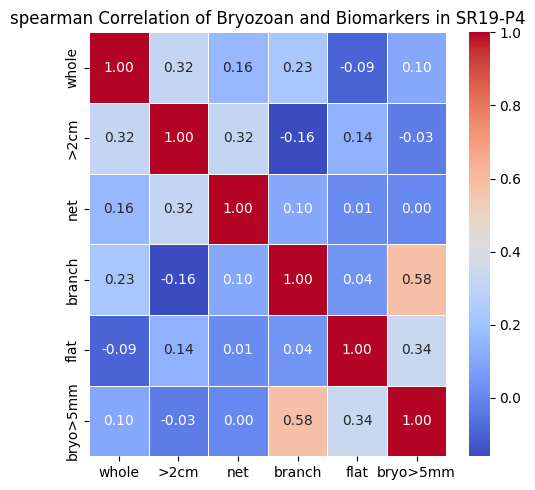

In [5]:
sr19_corr_spearman = sr19.plot_corr_matrix(core_name="SR19-P4")

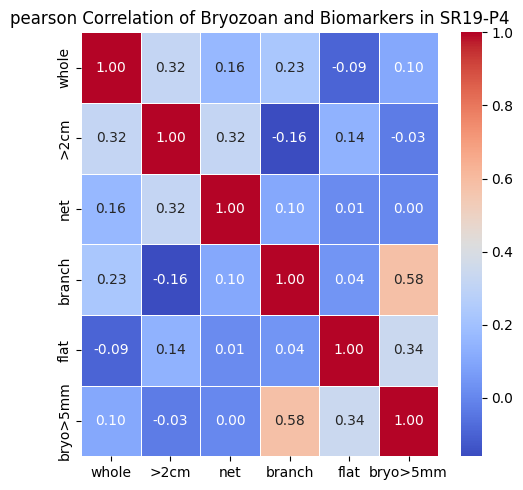

In [6]:
sr19_corr_pearson = sr19.plot_corr_matrix(core_name="SR19-P4", method="pearson")

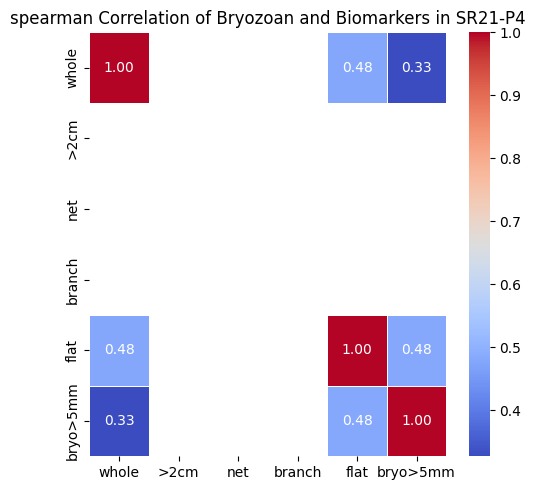

In [7]:
sr21_corr_spearman = sr21.plot_corr_matrix(core_name="SR21-P4")

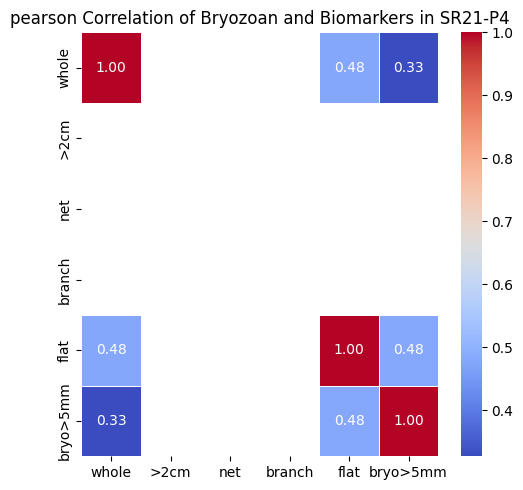

In [8]:
sr21_corr_pearson = sr21.plot_corr_matrix(core_name="SR21-P4", method="pearson")

#### $\chi^{2}$ Test

In [9]:
sr19.calc_chi2(sr21)

,net,branch,flat,bryo>5mm
Chi-Squared,13.067727,5.132182e+01,10.626803,18.298666
p-value,0.000300,7.839944e-13,0.001115,0.000019


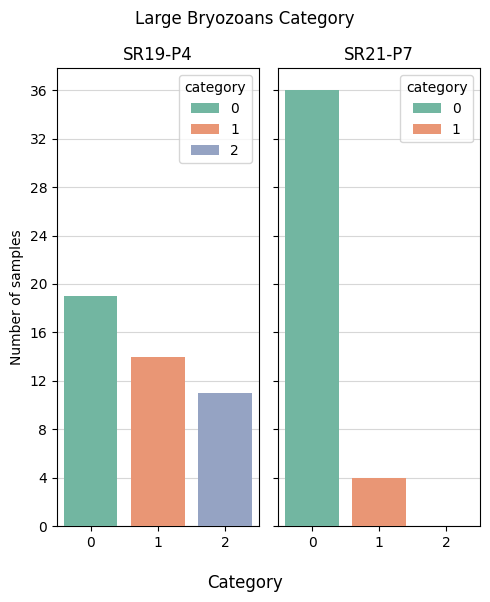

In [10]:
other_cores = [sr21]
core_names = ["SR19-P4", "SR21-P7"]
cat_plot = sr19.plot_large_bryo(others=other_cores, core_names=core_names, savefig=False, savepath="./data-files/mp-files/large-bryos.png")

(<Figure size 300x1000 with 1 Axes>,
 <Axes: title={'center': 'Bryozoan Types by Depth in SR19-P4'}, xlabel='Category', ylabel='Depth (cm)'>)

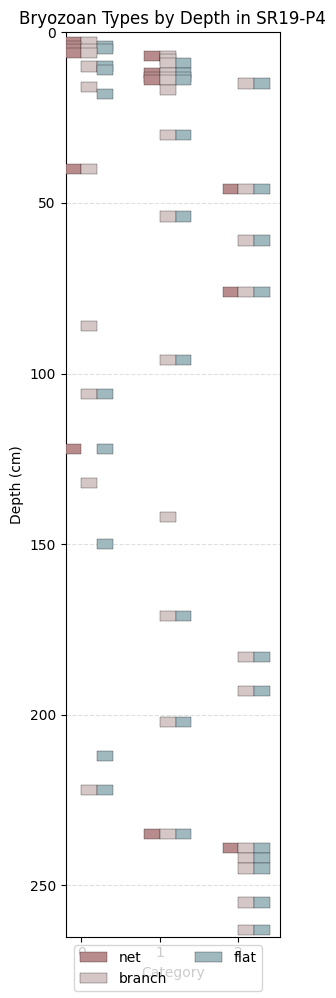

In [11]:
sr19.plot_depth_bars(core_name="SR19-P4", bar_width=0.2, bar_height=3)

(<Figure size 300x1000 with 1 Axes>,
 <Axes: title={'center': 'Bryozoan Types by Depth in SR21-P7'}, xlabel='Category', ylabel='Depth (cm)'>)

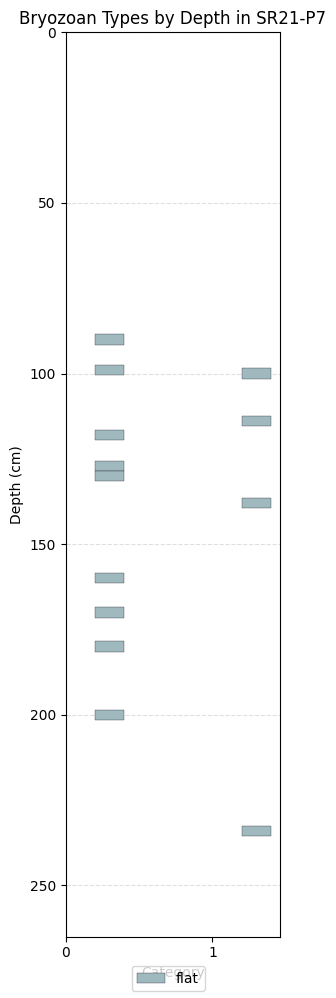

In [12]:
sr21.plot_depth_bars(core_name="SR21-P7", bar_width=0.2, bar_height=3)